<center>

## Organización de Datos: Trabajo Práctico N° 1 
### (1° Cuatrimestre 2020) 
###  Análisis Exploratorio (Grupo N°1)
</center>
 


In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

#para deteccion de lenguaje
import icu
import polyglot 
from polyglot.detect import Detector

#para wordclouds
from PIL import *
from wordcloud import WordCloud

In [2]:
#codigo para guardar la imagen en una carpeta
savefigs = False
figs_dir = '../figs'

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir('figs'):
        os.makedirs('figs')

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
#hago una columna nueva con la longitud de tweets
df['text_length'] = df['text'].apply(len)

In [6]:
df.head()

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [7]:
pd.options.display.max_colwidth

50

In [8]:
#para ver un poco mas en detalle los tweets y ver que se puede extraer ya sea hashtags etc
pd.options.display.max_colwidth = -1

In [9]:
df.iloc[0:10,3]

0    Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                
1    Forest fire near La Ronge Sask. Canada                                                                                               
2    All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3    13,000 people receive #wildfires evacuation orders in California                                                                     
4    Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school                                              
5    #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires                       
6    #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas                                      
7    I'm on top of the hill

In [10]:
pd.options.display.max_colwidth = 50

Analisis del lenguaje de los tweets
======

## En teoria esta todo en ingles, pero sera asi?

In [11]:
#saco caracteres invalidos para la liberia
def convert_utf_invalid_characters(x):
    return ''.join(x for x in x if x.isprintable())

In [12]:
df['temp_text'] = df['text'].apply(convert_utf_invalid_characters)

In [13]:
df.temp_text = df.temp_text.astype(str)
df['poly_obj'] = df.temp_text.apply(lambda x: Detector(x, quiet=True))

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

In [14]:
df['text_language'] = df['poly_obj'].apply(lambda x: icu.Locale.getDisplayName(x.language.locale))
df['text_lang_confidence'] = df['poly_obj'].apply( lambda x: x.language.confidence)

In [15]:
df['text_lang_confidence'].value_counts()

99.0    3945
98.0    2849
97.0     510
96.0     182
95.0      65
94.0      28
93.0       9
90.0       7
88.0       6
92.0       4
91.0       4
0.0        2
87.0       1
80.0       1
Name: text_lang_confidence, dtype: int64

In [16]:
df['text_language'].value_counts()

inglés                7578
escocés                  6
danés                    4
noruego nynorsk          4
un                       2
latín                    2
waray                    2
eslovaco                 2
portugués                2
galés                    1
javanés                  1
estonio                  1
kinyarwanda              1
italiano                 1
setswana                 1
sesotho meridional       1
islandés                 1
manés                    1
malayo                   1
oromo                    1
Name: text_language, dtype: int64

Analizo aquellos de poca confianza en el detector
------

In [17]:
#para ver un poco mas en detalle los tweets
pd.options.display.max_colwidth = -1

In [18]:
df.loc[df['text_lang_confidence'] == 0,['text']]

,text
323,@paddytomlinson1 ARMAGEDDON
2067,lmfao fucking luis hhahaha im dead


### Los UnknownLanguage son los de poca confianza y es texto en ingles

Analizo aquellos de diferentes idioma en el detector
------

In [19]:
df.loc[df['text_language'] != 'inglés',['text']]

,text
323,@paddytomlinson1 ARMAGEDDON
336,European Fitba till Christmas ARMAGEDDON
362,.: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: .: RT DrAyesha4: #IndiaKoMunTorJawabDo\n\nIndian Army kiÛ_ http://t.co/WJLJq3yA4g
688,@BaseballQuotes1 I have a 32 inch dynasty
823,@Blizzard_Gamin ight
848,@LoneWolffur BRUH *dies*
876,#RolandoNaBeats: Ellie Goulding - My Blood | Acesse nosso site para ouvir! http://t.co/Zk69uGXMT8
895,Bloody insomnia again! Grrrr!! #Insomnia
1034,@Deeeznvtzzz bring the body bags tho
1450,@5SOSFamUpdater social casualty


### En conclusion tenemos todos tweets en ingles salvo 3 que mezclan ingles con otros idiomas, 2 en portugues (indice 876 y 4503) y 1 en español (indice 7586), a tener en cuenta si se quiere hacer un analisis de sentimiento en el futuro, habra que traducir las palabras de su idioma a ingles

In [20]:
pd.options.display.max_colwidth = 50

In [21]:
df.drop(['temp_text','poly_obj','text_language','text_lang_confidence'], axis=1, inplace=True)

# Extraccion de strings para wordclouds

## Hashtags (unicos)

In [22]:
import re

In [23]:
def extract_hashtag(x):
    return re.findall(r'#\w+', x)

In [24]:
def get_hashtag_list_length(x):
    return len(x)

In [25]:
df['hashtags'] = df['text'].apply(extract_hashtag)
df['hashtags_len'] = df['hashtags'].apply(get_hashtag_list_length)

In [26]:
df['hashtags_len'].max()

13

In [27]:
h_list = ['h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13']

In [28]:
df_ht = pd.DataFrame(df.hashtags.tolist(), index= df.index,columns=h_list)

In [29]:
def remove_ht(x):
    return re.sub('#', '', x)

In [30]:
df_ht = df_ht.astype(str)

In [31]:
df_ht['h1'] = df_ht['h1'].apply(remove_ht)
df_ht['h2'] = df_ht['h2'].apply(remove_ht)
df_ht['h3'] = df_ht['h3'].apply(remove_ht)
df_ht['h4'] = df_ht['h4'].apply(remove_ht)
df_ht['h5'] = df_ht['h5'].apply(remove_ht)
df_ht['h6'] = df_ht['h6'].apply(remove_ht)
df_ht['h7'] = df_ht['h7'].apply(remove_ht)
df_ht['h8'] = df_ht['h8'].apply(remove_ht)
df_ht['h9'] = df_ht['h9'].apply(remove_ht)
df_ht['h10'] = df_ht['h10'].apply(remove_ht)
df_ht['h11'] = df_ht['h11'].apply(remove_ht)
df_ht['h12'] = df_ht['h12'].apply(remove_ht)
df_ht['h13'] = df_ht['h13'].apply(remove_ht)

In [32]:
#dropeo la row 0 que es None
df_ht_1 = df_ht.h1.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_2 = df_ht.h2.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_3 = df_ht.h3.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_4 = df_ht.h4.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_5 = df_ht.h5.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_6 = df_ht.h6.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_7 = df_ht.h7.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_8 = df_ht.h8.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_9 = df_ht.h9.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_10 = df_ht.h10.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_11 = df_ht.h11.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_12 = df_ht.h12.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_13 = df_ht.h13.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)

In [33]:
df_tot = df_ht_1.merge(df_ht_2,on='unique_values',how='outer').merge(df_ht_3,on='unique_values',how='outer')\
.merge(df_ht_4,on='unique_values',how='outer').merge(df_ht_5,on='unique_values',how='outer')\
.merge(df_ht_6,on='unique_values',how='outer').merge(df_ht_7,on='unique_values',how='outer')\
.merge(df_ht_8,on='unique_values',how='outer').merge(df_ht_9,on='unique_values',how='outer')\
.merge(df_ht_10,on='unique_values',how='outer').merge(df_ht_11,on='unique_values',how='outer')\
.merge(df_ht_12,on='unique_values',how='outer').merge(df_ht_13,on='unique_values',how='outer')

In [34]:
df_tot.head(5)

,unique_values,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts
0,hot,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,news,19.0,16.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,News,18.0,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,Hiroshima,16.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GBBO,12.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_tot['total_count'] = df_tot.sum(axis=1) 

In [36]:
df_tot = df_tot[['unique_values','total_count']]

In [37]:
df_tot.head(5)

,unique_values,total_count
0,hot,31.0
1,news,38.0
2,News,38.0
3,Hiroshima,21.0
4,GBBO,17.0


In [38]:
df_tot.shape

(2087, 2)

In [39]:
df_tot_to_dict_for_wc = pd.Series(df_tot.total_count.values,index=df_tot.unique_values).to_dict()

In [40]:
ht_mask = np.array(Image.open("imgforwc/ht.png"))

In [41]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [42]:
# Transform your mask into a new one that will work with the function:
transformed_ht_mask = np.ndarray((ht_mask.shape[0],ht_mask.shape[1]), np.int32)

for i in range(len(ht_mask)):
    transformed_ht_mask[i] = list(map(transform_format, ht_mask[i]))

## Wordcloud asumiendo que cada hashtag es unico y se tiene en cuenta la diferencia entre mayusculas

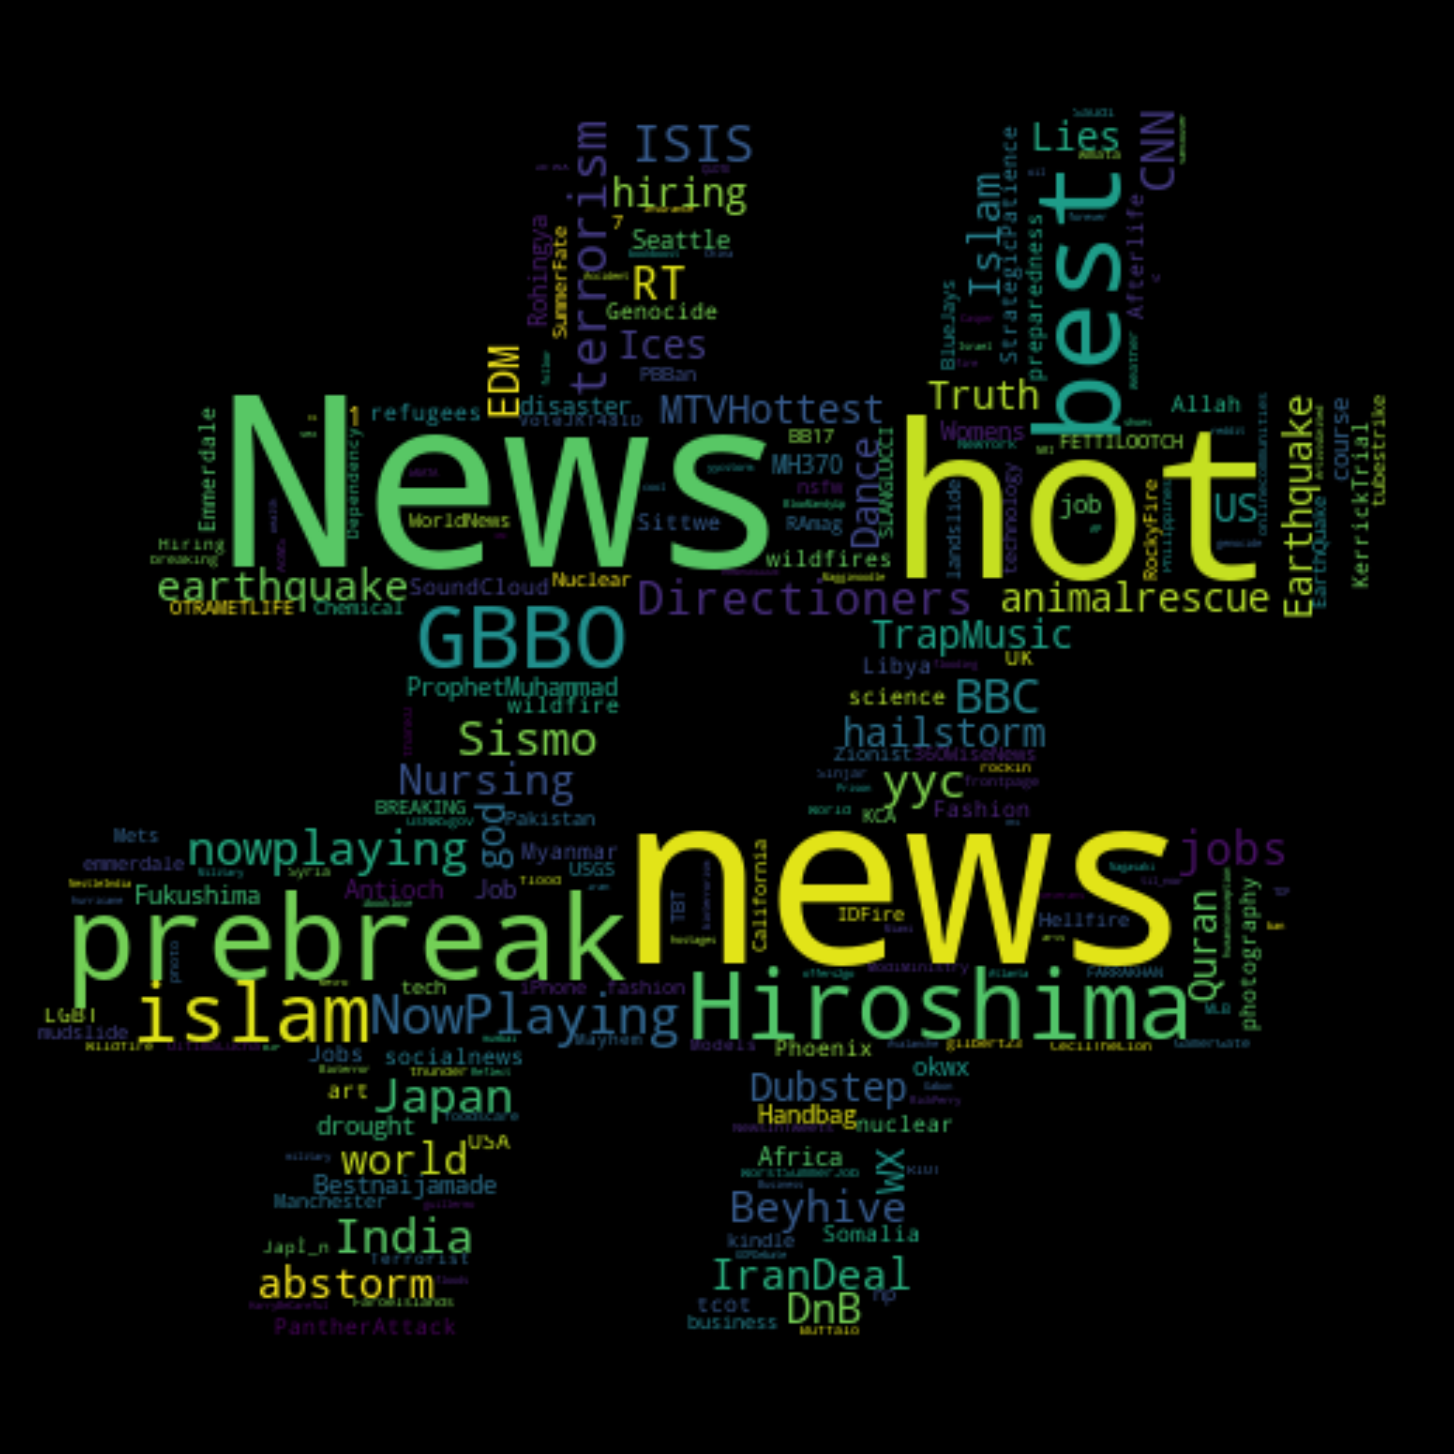

In [43]:
wordcloud = WordCloud(
    width = 400,
    height = 400,
    background_color = 'black',
    max_words = 900,
    mask=transformed_ht_mask).generate_from_frequencies(df_tot_to_dict_for_wc)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Como news es predominante voy a hacer otro definitivo con todo en minusculas para mayor claridad

## Hashtags (removiendo las mayusculas para juntarlos)

In [44]:
def to_lowercase(x):
    return x.lower()

In [45]:
df_ht['h1'] = df_ht['h1'].apply(to_lowercase)
df_ht['h2'] = df_ht['h2'].apply(to_lowercase)
df_ht['h3'] = df_ht['h3'].apply(to_lowercase)
df_ht['h4'] = df_ht['h4'].apply(to_lowercase)
df_ht['h5'] = df_ht['h5'].apply(to_lowercase)
df_ht['h6'] = df_ht['h6'].apply(to_lowercase)
df_ht['h7'] = df_ht['h7'].apply(to_lowercase)
df_ht['h8'] = df_ht['h8'].apply(to_lowercase)
df_ht['h9'] = df_ht['h9'].apply(to_lowercase)
df_ht['h10'] = df_ht['h10'].apply(to_lowercase)
df_ht['h11'] = df_ht['h11'].apply(to_lowercase)
df_ht['h12'] = df_ht['h12'].apply(to_lowercase)
df_ht['h13'] = df_ht['h13'].apply(to_lowercase)

In [46]:
#dropeo la row 0 que es None
df_ht_1 = df_ht.h1.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_2 = df_ht.h2.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_3 = df_ht.h3.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_4 = df_ht.h4.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_5 = df_ht.h5.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_6 = df_ht.h6.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_7 = df_ht.h7.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_8 = df_ht.h8.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_9 = df_ht.h9.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_10 = df_ht.h10.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_11 = df_ht.h11.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_12 = df_ht.h12.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)
df_ht_13 = df_ht.h13.value_counts().rename_axis('unique_values').reset_index(name='counts').drop(0)

In [47]:
df_tot = df_ht_1.merge(df_ht_2,on='unique_values',how='outer').merge(df_ht_3,on='unique_values',how='outer')\
.merge(df_ht_4,on='unique_values',how='outer').merge(df_ht_5,on='unique_values',how='outer')\
.merge(df_ht_6,on='unique_values',how='outer').merge(df_ht_7,on='unique_values',how='outer')\
.merge(df_ht_8,on='unique_values',how='outer').merge(df_ht_9,on='unique_values',how='outer')\
.merge(df_ht_10,on='unique_values',how='outer').merge(df_ht_11,on='unique_values',how='outer')\
.merge(df_ht_12,on='unique_values',how='outer').merge(df_ht_13,on='unique_values',how='outer')

In [48]:
df_tot.head(5)

,unique_values,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts_x,counts_y,counts
0,news,37.0,32.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1,hot,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nowplaying,20.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,earthquake,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hiroshima,17.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_tot['total_count'] = df_tot.sum(axis=1) 

In [50]:
df_tot = df_tot[['unique_values','total_count']]

In [51]:
df_tot.head(5)

,unique_values,total_count
0,news,76.0
1,hot,31.0
2,nowplaying,23.0
3,earthquake,19.0
4,hiroshima,22.0


In [52]:
df_tot.shape

(1926, 2)

In [53]:
df_tot_to_dict_for_wc = pd.Series(df_tot.total_count.values,index=df_tot.unique_values).to_dict()

## Wordcloud asumiendo que para cada hashtag no se tiene en cuenta la diferencia entre mayusculas

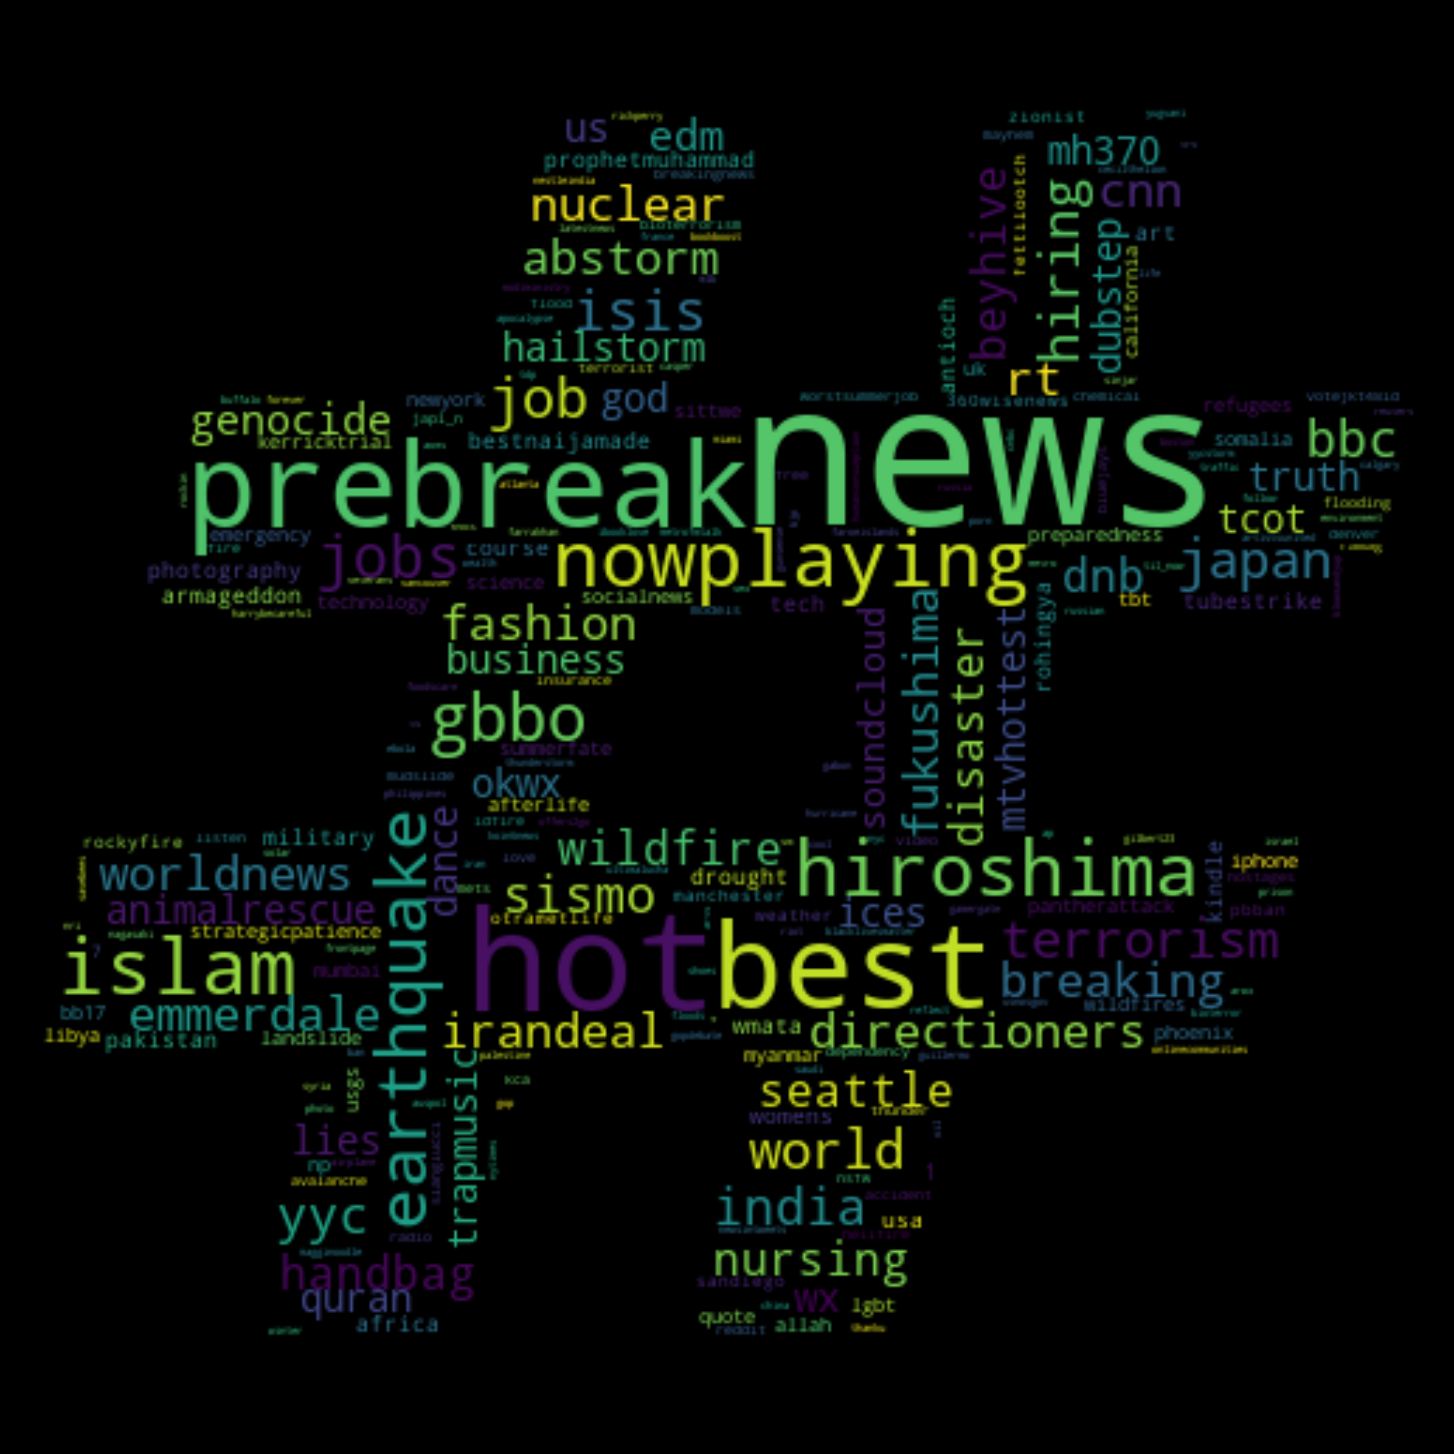

In [54]:
wordcloud = WordCloud(
    width = 400,
    height = 400,
    background_color = 'black',
    max_words=900,
    mask=transformed_ht_mask).generate_from_frequencies(df_tot_to_dict_for_wc)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
if savefigs:
    plt.savefig('figs/ht_wc.png', bbox_inches='tight')
plt.show()